In this question the analysis is related to India only, so in this question we are analysing all possible insights related to India, this will actulally helps to get insights how indian is performing in asian and olympic games. 

So, in this question we try to find something like percentage of medals won by india in asian and olympic games, we can also find top n-players in india and top n-players in a particular year in both asian and olympic games,we can also find sportwise performance of India and many such insights we can derive in this question. 

In [40]:
import pandas as pd

In [41]:
asian_player=pd.read_csv("Players_Medal_List_Asian.csv")
olympic_player=pd.read_csv("Players_Medal_List_Olympics.csv")

In [42]:
asian_medal=pd.read_csv("Medal_List_Asian.csv")
olympic_medal=pd.read_csv("Medal_List_Olympics.csv")

In [43]:
asian_medal["Year"]=asian_medal["Year"].astype('int64')

In [44]:
asian_medal.head()

,Year,Sport,Rank,Country,Gold,Silver,Bronze,Total
0,1951,Athletics,1,Japan,20,17,11,48
1,1951,Athletics,2,India,10,12,12,34
2,1951,Athletics,3,Singapore,1,2,2,5
3,1951,Athletics,4,Iran,1,1,0,2
4,1951,Athletics,5,Philippines,1,0,3,4


In [45]:
olympic_medal.head()

,Year,Host_City,Sport,Country,Gold,Silver,Bronze,Total
0,1952,Helsinki,Boxing,South Korea,0,0,1,1
1,1952,Helsinki,Gymnastics,Japan,0,0,1,1
2,1952,Helsinki,Gymnastics,Japan,0,2,0,2
3,1952,Helsinki,Hockey,India,1,0,0,1
4,1952,Helsinki,Swimming,Japan,0,1,0,1


## Percentage of medals won

In [46]:
total=asian_medal[asian_medal["Country"]=="India"]["Total"].sum()
gold=asian_medal[asian_medal["Country"]=="India"]["Gold"].sum()
silver=asian_medal[asian_medal["Country"]=="India"]["Silver"].sum()
bronze=asian_medal[asian_medal["Country"]=="India"]["Bronze"].sum()

total_medal=asian_medal["Total"].sum()
total_gold=asian_medal["Gold"].sum()
total_silver=asian_medal["Silver"].sum()
total_bronze=asian_medal["Bronze"].sum()


t=(total/total_medal)*100
g=(gold/total_gold)*100
s=(silver/total_silver)*100
b=(bronze/total_bronze)*100

print(f"Percentage of Total Medal won by India in Asian games : {round(t,2)}%")
print(f"Percentage of Gold Medal won by India in Asian games : {round(g,2)}%")
print(f"Percentage of Silver Medal won by India in Asian games : {round(s,2)}%")
print(f"Percentage of Bronze Medal won by India in Asian games : {round(b,2)}%")

Percentage of Total Medal won by India in Asian games : 4.38%
Percentage of Gold Medal won by India in Asian games : 3.23%
Percentage of Silver Medal won by India in Asian games : 4.16%
Percentage of Bronze Medal won by India in Asian games : 5.51%


In [47]:
total=olympic_medal[olympic_medal["Country"]=="India"]["Total"].sum()
gold=olympic_medal[olympic_medal["Country"]=="India"]["Gold"].sum()
silver=olympic_medal[olympic_medal["Country"]=="India"]["Silver"].sum()
bronze=olympic_medal[olympic_medal["Country"]=="India"]["Bronze"].sum()

total_medal=olympic_medal["Total"].sum()
total_gold=olympic_medal["Gold"].sum()
total_silver=olympic_medal["Silver"].sum()
total_bronze=olympic_medal["Bronze"].sum()


t=(total/total_medal)*100
g=(gold/total_gold)*100
s=(silver/total_silver)*100
b=(bronze/total_bronze)*100

print(f"Percentage of Total Medal won by India in Olympic games : {round(t,2)}%")
print(f"Percentage of Gold Medal won by India in Olympic games : {round(g,2)}%")
print(f"Percentage of Silver Medal won by India in Olympic games : {round(s,2)}%")
print(f"Percentage of Bronze Medal won by India in Olympic games : {round(b,2)}%")

Percentage of Total Medal won by India in Olympic games : 1.58%
Percentage of Gold Medal won by India in Olympic games : 0.97%
Percentage of Silver Medal won by India in Olympic games : 1.24%
Percentage of Bronze Medal won by India in Olympic games : 2.44%


## Variation of medal over years

In [48]:
asian_total_variation=asian_medal[asian_medal["Country"]=="India"][["Year","Gold","Silver","Bronze","Total"]]
asian_total_variation=asian_total_variation.groupby(["Year"]).sum().reset_index()
asian_total_variation.head()

,Year,Gold,Silver,Bronze,Total
0,1951,15,16,20,51
1,1954,5,4,8,17
2,1958,5,4,4,13
3,1962,10,13,10,33
4,1966,7,3,11,21


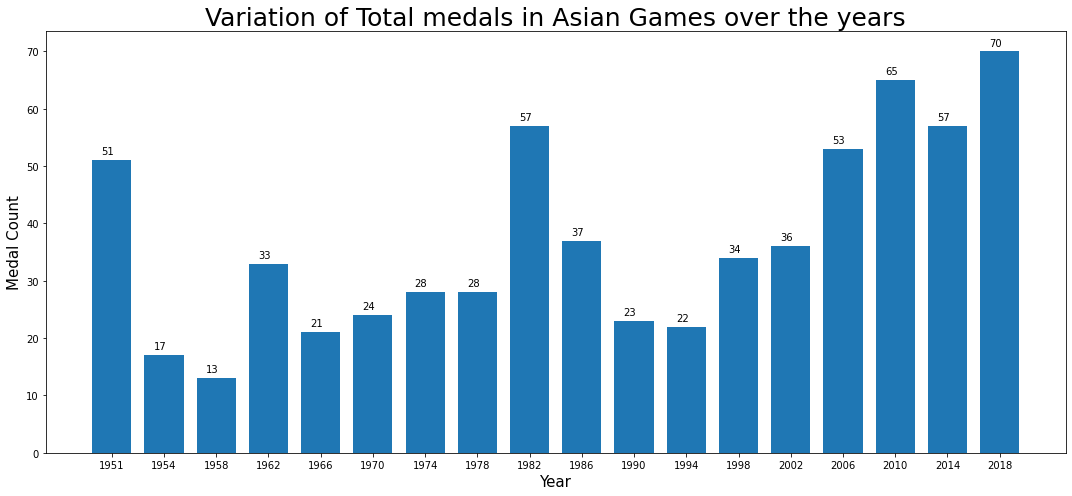

In [49]:
import matplotlib.pyplot as plt
import numpy as np

fig,ax=plt.subplots(figsize=(15,7))

labels=asian_total_variation["Year"].values
y=asian_total_variation["Total"].values
x=np.arange(len(labels))

ax.bar(x,y,width=0.75)

ax.set_title("Variation of Total medals in Asian Games over the years",fontdict={'fontsize':25})
ax.set_xlabel("Year",fontdict={'fontsize':15})
ax.set_ylabel("Medal Count",fontdict={'fontsize':15})
ax.set_xticks(x)
ax.set_xticklabels(labels)

for i,val in enumerate(y):
    ax.text(i-0.2,val+1,str(val))

fig.tight_layout()
plt.show()

in this bar graph we can see that in year 2018 india won maximum number of medals and in 1958 minimum number of medals. 

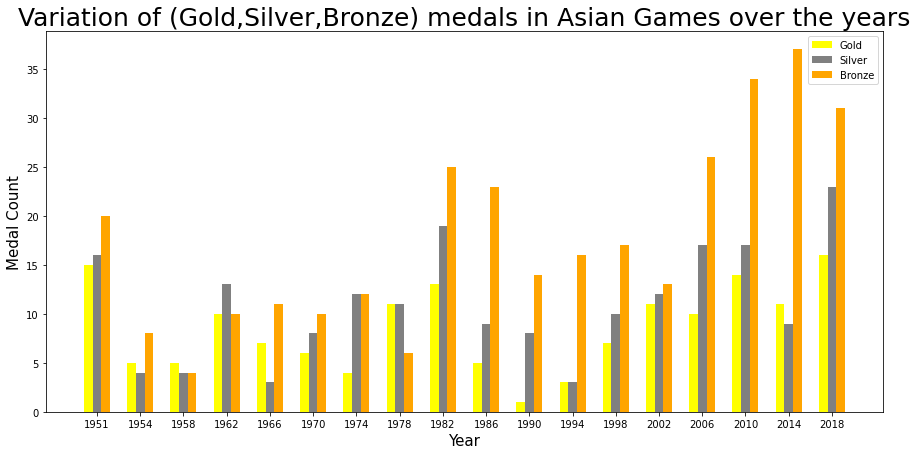

In [50]:
fig,ax=plt.subplots(figsize=(15,7))

labels=asian_total_variation["Year"].values

gold=asian_total_variation["Gold"].values
silver=asian_total_variation["Silver"].values
bronze=asian_total_variation["Bronze"].values
width=0.2

x=np.arange(len(labels))

rects1=ax.bar(x-0.2,gold,width=width,label='Gold',color='yellow')
rects2=ax.bar(x,silver,width=width,label='Silver',color='gray')
rects3=ax.bar(x+0.2,bronze,width=width,label='Bronze',color='orange')

ax.set_title("Variation of (Gold,Silver,Bronze) medals in Asian Games over the years",fontdict={'fontsize':25})
ax.set_xlabel("Year",fontdict={'fontsize':15})
ax.set_ylabel("Medal Count",fontdict={'fontsize':15})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

This bar tells that how the number of gold,silver and bronze varies over the years for asian games, like we can see that in year 1951 and 2018 India has more number of gold medals as compared to other years, also in 2014 india has maximum number of bronze medals and in 2018 maximum number of silver medals.

In [51]:
olympic_total_variation=olympic_medal[olympic_medal["Country"]=="India"][["Year","Gold","Silver","Bronze","Total"]]
olympic_total_variation=olympic_total_variation.groupby(["Year"]).sum().reset_index()
olympic_total_variation.head()

,Year,Gold,Silver,Bronze,Total
0,1952,1,0,1,2
1,1956,1,0,0,1
2,1960,0,1,0,1
3,1964,1,0,0,1
4,1968,0,0,1,1


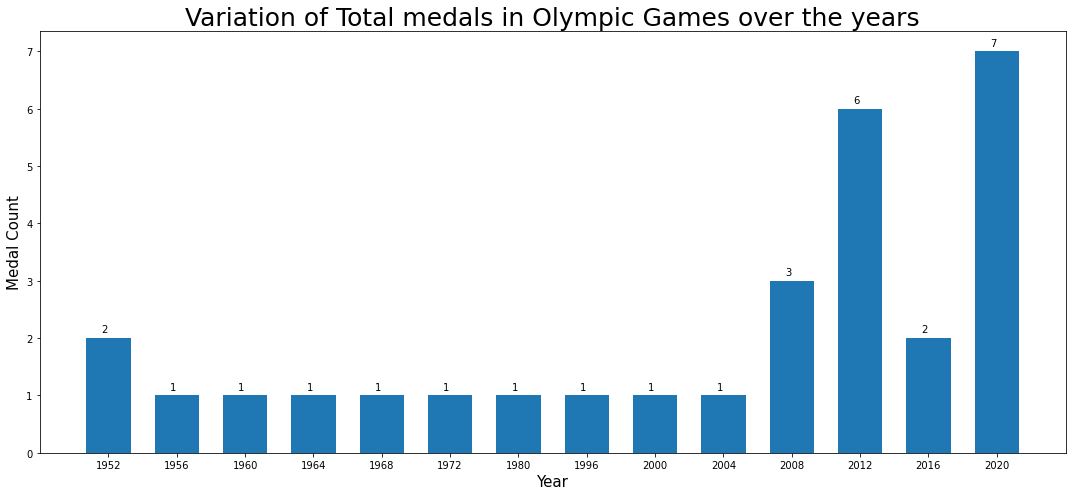

In [52]:
fig,ax=plt.subplots(figsize=(15,7))

labels=olympic_total_variation["Year"].values
y=olympic_total_variation["Total"].values
x=np.arange(len(labels))

ax.bar(x,y,width=0.65)

ax.set_title("Variation of Total medals in Olympic Games over the years",fontdict={'fontsize':25})
ax.set_xlabel("Year",fontdict={'fontsize':15})
ax.set_ylabel("Medal Count",fontdict={'fontsize':15})
ax.set_xticks(x)
ax.set_xticklabels(labels)

for i,val in enumerate(y):
    ax.text(i-0.1,val+0.1,str(val))

fig.tight_layout()
plt.show()

in this bar graph we can see that in year 2020 india won maximum number of medals and from 1956 to 2004 minimum constant number of medals in olympic games. 

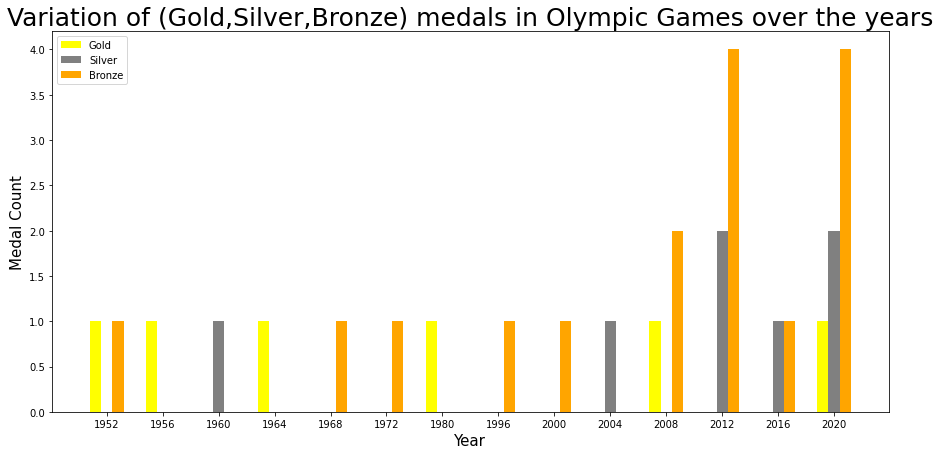

In [53]:
fig,ax=plt.subplots(figsize=(15,7))

labels=olympic_total_variation["Year"].values

gold=olympic_total_variation["Gold"].values
silver=olympic_total_variation["Silver"].values
bronze=olympic_total_variation["Bronze"].values
width=0.2

x=np.arange(len(labels))

rects1=ax.bar(x-0.2,gold,width=width,label='Gold',color='yellow')
rects2=ax.bar(x,silver,width=width,label='Silver',color='gray')
rects3=ax.bar(x+0.2,bronze,width=width,label='Bronze',color='orange')

ax.set_title("Variation of (Gold,Silver,Bronze) medals in Olympic Games over the years",fontdict={'fontsize':25})
ax.set_xlabel("Year",fontdict={'fontsize':15})
ax.set_ylabel("Medal Count",fontdict={'fontsize':15})
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

This bar tells that how the number of gold,silver and bronze varies over the years for olympic games, like we can see that in year 2012 and 2020 India has max number of bronze medals as compared to other years, also in 2012 and 2020 india has maximum number of silver medals and we can also see that there are some years in which india did not get any gold medal.

## Variation of Medal sportwise

In [54]:
asian_sport_total=asian_medal[asian_medal["Country"]=="India"][["Sport","Gold","Silver","Bronze","Total"]]
asian_sport_total=asian_sport_total.groupby("Sport").sum().reset_index()
asian_sport_total.head()

,Sport,Gold,Silver,Bronze,Total
0,Archery,1,4,5,10
1,Athletics,79,88,87,254
2,Badminton,0,1,9,10
3,Boxing,9,16,32,57
4,Bridge,1,0,2,3


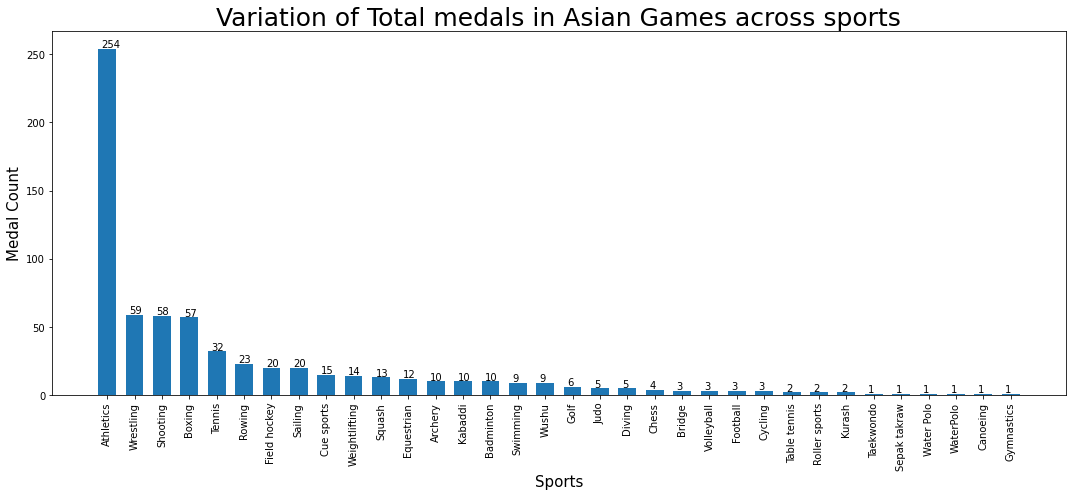

In [55]:
temp=asian_sport_total[["Sport","Total"]]
temp=temp.sort_values("Total",ascending=False)

fig,ax=plt.subplots(figsize=(15,7))

labels=temp["Sport"].values
y=temp["Total"].values
x=np.arange(len(labels))

ax.bar(x,y,width=0.65)
ax.set_title("Variation of Total medals in Asian Games across sports",fontdict={'fontsize':25})
ax.set_xlabel("Sports",fontdict={'fontsize':15})
ax.set_ylabel("Medal Count",fontdict={'fontsize':15})
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)

for i,val in enumerate(y):
    ax.text(i-0.2,val+1,str(val))

fig.tight_layout()
plt.show()

In this bar graph we can see that India won maximum number of medals in "Athletics" as compared to other sports in asian games.

In [56]:
olympics_sport_total=olympic_medal[olympic_medal["Country"]=="India"][["Sport","Gold","Silver","Bronze","Total"]]
olympics_sport_total=olympics_sport_total.groupby("Sport").sum().reset_index()
olympics_sport_total.head()

,Sport,Gold,Silver,Bronze,Total
0,Athletics,1,0,0,1
1,Badminton,0,1,2,3
2,Boxing,0,0,3,3
3,Field hockey,0,0,1,1
4,Hockey,4,1,2,7


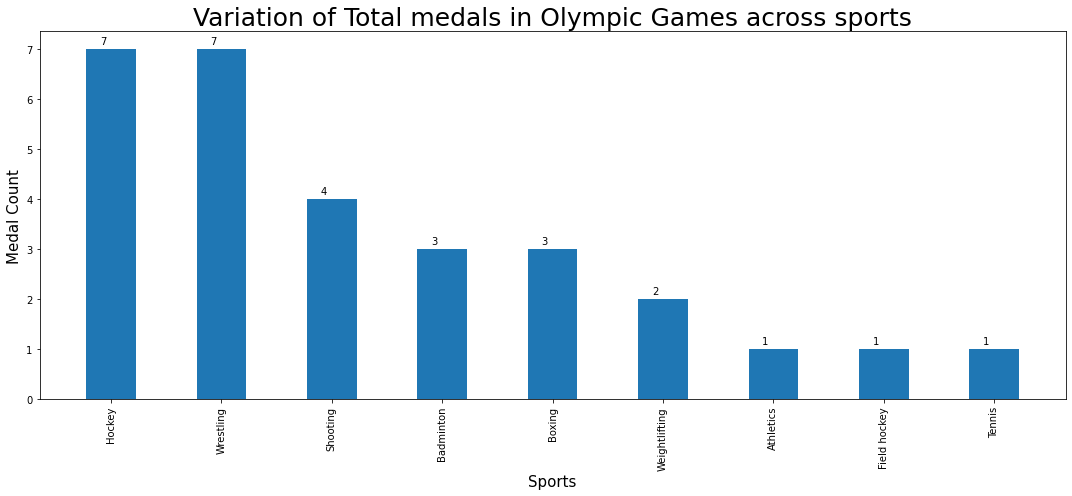

In [57]:
temp=olympics_sport_total[["Sport","Total"]]
temp=temp.sort_values("Total",ascending=False)

fig,ax=plt.subplots(figsize=(15,7))

labels=temp["Sport"].values
y=temp["Total"].values
x=np.arange(len(labels))

ax.bar(x,y,width=0.45)
ax.set_title("Variation of Total medals in Olympic Games across sports",fontdict={'fontsize':25})
ax.set_xlabel("Sports",fontdict={'fontsize':15})
ax.set_ylabel("Medal Count",fontdict={'fontsize':15})
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=90)

for i,val in enumerate(y):
    ax.text(i-0.1,val+0.1,str(val))

fig.tight_layout()
plt.show()

In this bar graph we can see that India won maximum number of medals in "Hockey" and "Wrestling" as compared to other sports in olympic games.

## Top n-players yearwise

In [58]:
top_player=asian_player[(asian_player["Country"]=="India") & (asian_player["Sport_Type"]=="Single")][["Player_Name","Year","Sport","Gender","Gold","Silver","Bronze"]]
top_player=top_player.groupby(["Year","Sport",'Gender',"Player_Name"]).sum().reset_index()
top_player["Total"]=top_player["Gold"]+top_player["Silver"]+top_player["Bronze"]
top_player.head()

,Year,Sport,Gender,Player_Name,Gold,Silver,Bronze,Total
0,1951,Athletics,F,Barbara Webster,0,0,2,2
1,1951,Athletics,F,Marie Semoes,0,0,1,1
2,1951,Athletics,F,Mary D'Souza,0,0,1,1
3,1951,Athletics,F,Roshan Mistry,0,1,0,1
4,1951,Athletics,F,Sylvia Gauntlet,0,0,1,1


In [59]:
top_index=top_player.groupby(["Year"])["Total"].nlargest(3).reset_index()
top_index=top_index["level_1"].values

asian_top_player=top_player.loc[top_index]
asian_top_player=asian_top_player.reset_index(drop=True)
asian_top_player.head()

,Year,Sport,Gender,Player_Name,Gold,Silver,Bronze,Total
0,1951,Athletics,F,Barbara Webster,0,0,2,2
1,1951,Athletics,M,Lavy Pinto,2,0,0,2
2,1951,Diving,M,K. P. Thakkar,2,0,0,2
3,1954,Athletics,M,Dalu Ram,0,0,2,2
4,1954,Athletics,M,Parduman Singh Brar,2,0,0,2


In [60]:
top_player_oly=olympic_player[(olympic_player["Country"]=="India") & (olympic_player["Sport_Type"]=="Individual")][["Name","Year","Sport","Gender","Gold","Silver","Bronze"]]
top_player_oly=top_player_oly.groupby(["Year","Sport","Gender","Name"]).sum().reset_index()
top_player_oly["Total"]=top_player_oly["Gold"]+top_player_oly["Silver"]+top_player_oly["Bronze"]
top_player_oly.head()

,Year,Sport,Gender,Name,Gold,Silver,Bronze,Total
0,1952,Wrestling,M,Khashaba Dadasaheb Jahdav,0,0,1,1
1,1996,Tennis,M,Leander Adrian Paes,0,0,1,1
2,2000,Weightlifting,F,Karnam Malleswari,0,0,1,1
3,2004,Shooting,M,Rajyavardhan Singh Rathore,0,1,0,1
4,2008,Boxing,M,Vijender Kumar Singh,0,0,1,1


In [61]:
top_index=top_player_oly.groupby(["Year"])["Total"].nlargest(3).reset_index()
top_index=top_index["level_1"].values

olympic_top_player=top_player_oly.loc[top_index]
olympic_top_player=olympic_top_player.reset_index(drop=True)
olympic_top_player.head()

,Year,Sport,Gender,Name,Gold,Silver,Bronze,Total
0,1952,Wrestling,M,Khashaba Dadasaheb Jahdav,0,0,1,1
1,1996,Tennis,M,Leander Adrian Paes,0,0,1,1
2,2000,Weightlifting,F,Karnam Malleswari,0,0,1,1
3,2004,Shooting,M,Rajyavardhan Singh Rathore,0,1,0,1
4,2008,Boxing,M,Vijender Kumar Singh,0,0,1,1


## top nplayers till now

In [62]:
top_player_asia=asian_player[(asian_player["Country"]=="India") & (asian_player["Sport_Type"]=="Single")][["Sport","Player_Name","Gender","Gold","Silver","Bronze"]]
top_player_asia=top_player_asia.groupby(["Sport","Gender","Player_Name"]).sum().reset_index()
top_player_asia["Total"]=top_player_asia["Gold"]+top_player_asia["Silver"]+top_player_asia["Bronze"]
top_player_asia.head()

,Sport,Gender,Player_Name,Gold,Silver,Bronze,Total
0,Archery,F,Trisha Deb,0,0,1,1
1,Archery,M,Abhishek Verma,0,1,0,1
2,Archery,M,Tarundeep Rai,0,1,0,1
3,Athletics,F,Angel Mary Joseph,0,2,0,2
4,Athletics,F,Anju Bobby George,1,1,0,2


In [63]:
asian_top_player=top_player_asia.nlargest(5,columns=["Total"])
asian_top_player=asian_top_player.sort_values(by=["Gold","Silver","Bronze"],ascending=False)

In [64]:
asian_top_player

,Sport,Gender,Player_Name,Gold,Silver,Bronze,Total
38,Athletics,F,P. T. Usha,3,4,0,7
129,Athletics,M,Parduman Singh Brar,3,1,1,5
132,Athletics,M,Praveen Kumar,2,1,1,4
14,Athletics,F,Geeta Zutshi,1,3,0,4
55,Athletics,F,Sunita Rani,1,1,2,4


In [65]:
top_player_oly=olympic_player[(olympic_player["Country"]=="India") & (olympic_player["Sport_Type"]=="Individual")][["Sport","Name","Gender","Gold","Silver","Bronze"]]
top_player_oly=top_player_oly.groupby(["Sport","Gender","Name"]).sum().reset_index()
top_player_oly["Total"]=top_player_oly["Gold"]+top_player_oly["Silver"]+top_player_oly["Bronze"]
top_player_oly.head()

,Sport,Gender,Name,Gold,Silver,Bronze,Total
0,Athletics,M,Neeraj Chopra,1,0,0,1
1,Badminton,F,P. V. Sindhu,0,0,1,1
2,Badminton,F,"Pusarla Venkata ""P. V."" Sindhu",0,1,0,1
3,Badminton,F,Saina Nehwal,0,0,1,1
4,Boxing,F,Lovlina Borgohain,0,0,1,1


In [66]:
olympic_top_player=top_player_oly.nlargest(5,columns=["Total"])
olympic_top_player=olympic_top_player.sort_values(by=["Gold","Silver","Bronze"],ascending=False)

In [67]:
olympic_top_player

,Sport,Gender,Name,Gold,Silver,Bronze,Total
0,Athletics,M,Neeraj Chopra,1,0,0,1
18,Wrestling,M,Sushil Kumar Solanki,0,1,1,2
2,Badminton,F,"Pusarla Venkata ""P. V."" Sindhu",0,1,0,1
1,Badminton,F,P. V. Sindhu,0,0,1,1
3,Badminton,F,Saina Nehwal,0,0,1,1
